<a href="https://colab.research.google.com/github/Friscadwii/Project-UMKM-TerraStore/blob/main/Project_UMKM_Terra_Storre_MBA_Frisca_Dwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import gc
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime as dt
import mlxtend.preprocessing
import mlxtend.frequent_patterns

# **Load Data**

In [ ]:
#Load file
df = pd.read_excel('Capstone Project Kel.1 (1).xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menampilkan dataset

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No. Pesanan,Status Pesanan,Status Pembatalan/ Pengembalian,No. Resi,Opsi Pengiriman,Antar ke counter/ pick-up,Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan),Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Waktu Pembayaran Dilakukan,Metode Pembayaran,SKU Induk,Nama Produk,Nomor Referensi SKU,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Returned quantity,Total Harga Produk,Total Diskon,Diskon Dari Penjual,Diskon Dari Shopee,Berat Produk,Jumlah Produk di Pesan,Total Berat,Voucher Ditanggung Penjual,Cashback Koin,Voucher Ditanggung Shopee,Paket Diskon,Paket Diskon (Diskon dari Shopee),Paket Diskon (Diskon dari Penjual),Potongan Koin Shopee,Diskon Kartu Kredit,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Ongkos Kirim Pengembalian Barang,Total Pembayaran,Perkiraan Ongkos Kirim,Catatan dari Pembeli,Catatan,Username (Pembeli),Nama Penerima,No. Telepon,Alamat Pengiriman,Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai
0,23010160M3FU4A,Selesai,NaN,JP7713094624,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 00:27,2023-01-01 16:48,2023-01-01 00:27,2023-01-01 00:27,COD (Bayar di Tempat),NaN,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,NaN,"Hitam,(S) 60x60",19.899,19.899,1,NaN,19.899,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,10.0,0.0,21.695,9.0,NaN,NaN,intanp11,I******i,******83,De******,KAB. MAGETAN,JAWA TIMUR,2023-01-02 12:59
1,230101758PUTWU,Selesai,NaN,JP3779314742,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 11:23,2023-01-01 16:48,2023-01-01 11:23,2023-01-01 11:23,COD (Bayar di Tempat),NaN,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,NaN,"Latte,(S) 60x60",19.899,19.899,1,NaN,19.899,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,8.0,0.0,21.695,8.0,NaN,NaN,valentizarosifa,V******a,******33,Du******,KAB. MADIUN,JAWA TIMUR,2023-01-02 13:51
2,2301016N6NT8B5,Selesai,NaN,JP2811066140,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35,2023-01-01 16:48,2023-01-01 06:35,2023-01-01 06:35,COD (Bayar di Tempat),NaN,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,NaN,"Mocca,(S) 60x60",19.899,19.899,1,NaN,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,NaN,NaN,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58
3,2301016N6NT8B5,Selesai,NaN,JP2811066140,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35,2023-01-01 16:48,2023-01-01 06:35,2023-01-01 06:35,COD (Bayar di Tempat),NaN,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,NaN,"Hitam,(S) 60x60",19.899,19.899,1,NaN,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,NaN,NaN,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58
4,2301016N6NT8B5,Selesai,NaN,JP2811066140,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35,2023-01-01 16:48,2023-01-01 06:35,2023-01-01 06:35,COD (Bayar di Tempat),NaN,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,NaN,"Charcoal,(S) 60x60",19.899,19.899,1,NaN,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,NaN,NaN,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58


# **Data Preparation**

## Mengetahui jumlah baris dan kolom pada dataset

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6185, 48)

## Mengetahui type data tiap kolom dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 48 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   No. Pesanan                                                   6185 non-null   object 
 1   Status Pesanan                                                6185 non-null   object 
 2   Status Pembatalan/ Pengembalian                               22 non-null     object 
 3   No. Resi                                                      6185 non-null   object 
 4   Opsi Pengiriman                                               6185 non-null   object 
 5   Antar ke counter/ pick-up                                     6185 non-null   object 
 6   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   object 
 7   Waktu Pengiriman Diatur                                       6185 no

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menghitung descriptive statistics dari dataframe*

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SKU Induk,Nomor Referensi SKU,Harga Awal,Harga Setelah Diskon,Jumlah,Returned quantity,Total Harga Produk,Total Diskon,Diskon Dari Penjual,Diskon Dari Shopee,Jumlah Produk di Pesan,Voucher Ditanggung Penjual,Cashback Koin,Voucher Ditanggung Shopee,Paket Diskon (Diskon dari Shopee),Paket Diskon (Diskon dari Penjual),Potongan Koin Shopee,Diskon Kartu Kredit,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Ongkos Kirim Pengembalian Barang,Total Pembayaran,Perkiraan Ongkos Kirim,Catatan
count,0.0,0.0,6185.000000,6185.000000,6185.000000,0.0,6185.000000,6185.000000,6185.000000,6185.0,6185.000000,6185.000000,6185.0,6185.000000,6185.0,6185.0,6185.000000,6185.0,6185.00000,6185.000000,6185.000000,6185.000000,6185.000000,0.0
mean,NaN,NaN,20.576636,20.554329,1.103314,NaN,22.672308,0.480084,0.480084,0.0,2.229264,0.049203,0.0,31.007367,0.0,0.0,330.184155,0.0,4.74365,11.809759,0.001455,49.659021,14.785099,NaN
std,NaN,NaN,1.718721,1.690412,0.485392,NaN,10.132526,19.472952,19.472952,0.0,2.570824,0.524813,0.0,170.374030,0.0,0.0,2347.298964,0.0,28.94314,8.365743,0.114439,52.664151,9.494410,NaN
min,NaN,NaN,18.900000,18.899000,1.000000,NaN,18.899000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,8.000000,NaN
25%,NaN,NaN,19.899000,19.899000,1.000000,NaN,19.899000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,9.000000,0.000000,21.900000,9.000000,NaN
50%,NaN,NaN,19.900000,19.900000,1.000000,NaN,19.900000,0.000000,0.000000,0.0,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,10.000000,0.000000,39.800000,12.000000,NaN
75%,NaN,NaN,19.900000,19.900000,1.000000,NaN,20.899000,0.000000,0.000000,0.0,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,4.00000,15.000000,0.000000,54.730000,16.000000,NaN
max,NaN,NaN,42.900000,42.900000,10.000000,NaN,206.091000,884.000000,884.000000,0.0,35.000000,9.639000,0.0,996.000000,0.0,0.0,54971.000000,0.0,500.00000,60.000000,9.000000,724.542000,85.500000,NaN


# **Cleaning Data**

## Mengetahui jumlah total data yang terduplikasi pada dataset

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


75

## Menghapus kolom yang tidak diperlukan dalam proses analisis

In [ ]:
 # Menghapus Kolom yang Tidak Diperlukan
kolom_tidak_diperlukan = ['SKU Induk', 'Nomor Referensi SKU', 'Catatan', 'No. Resi', 'Returned quantity']
df = df.drop(columns=kolom_tidak_diperlukan)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mengisi nilai pada kolom yg terdapat missing values

In [ ]:
df['Status Pembatalan/ Pengembalian'].fillna('Tidak ada', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Catatan dari Pembeli'].fillna('Tidak ada', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Melihat Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Username (Pembeli)                                              11
No. Pesanan                                                      0
Ongkos Kirim Pengembalian Barang                                 0
Voucher Ditanggung Shopee                                        0
Paket Diskon                                                     0
Paket Diskon (Diskon dari Shopee)                                0
Paket Diskon (Diskon dari Penjual)                               0
Potongan Koin Shopee                                             0
Diskon Kartu Kredit                                              0
Ongkos Kirim Dibayar oleh Pembeli                                0
Estimasi Potongan Biaya Pengiriman                               0
Total Pembayaran                                                 0
Voucher Ditanggung Penjual                                       0
Perkiraan Ongkos Kirim                                           0
Catatan dari Pembeli                                          

# **Konversi Tipe Data**

## Merubah type data kolom yang belum sesuai

In [ ]:
date_columns = ['Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
                'Waktu Pengiriman Diatur',
                'Waktu Pesanan Dibuat',
                'Waktu Pembayaran Dilakukan',
                'Waktu Pesanan Selesai']

df[date_columns] = df[date_columns].apply(pd.to_datetime)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   No. Pesanan                                                   6185 non-null   object        
 1   Status Pesanan                                                6185 non-null   object        
 2   Status Pembatalan/ Pengembalian                               6185 non-null   object        
 3   Opsi Pengiriman                                               6185 non-null   object        
 4   Antar ke counter/ pick-up                                     6185 non-null   object        
 5   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   datetime64[ns]
 6   Waktu Pengiriman Diatur                                       6185 non-null   datetime64[ns]
 7   Waktu 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.to_csv('Capstone Project Kel 1 data_bersih - MBA.csv')

# **Market Basket Analisis (MBA)**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   No. Pesanan                                                   6185 non-null   object        
 1   Status Pesanan                                                6185 non-null   object        
 2   Status Pembatalan/ Pengembalian                               6185 non-null   object        
 3   Opsi Pengiriman                                               6185 non-null   object        
 4   Antar ke counter/ pick-up                                     6185 non-null   object        
 5   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   datetime64[ns]
 6   Waktu Pengiriman Diatur                                       6185 non-null   datetime64[ns]
 7   Waktu 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Identifikasi Pembatalan Pesanan**

In [ ]:
canceled_invoices = df[df['Status Pembatalan/ Pengembalian'] == 'Permintaan Dibatalkan']
canceled_invoices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No. Pesanan,Status Pesanan,Status Pembatalan/ Pengembalian,Opsi Pengiriman,Antar ke counter/ pick-up,Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan),Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Waktu Pembayaran Dilakukan,Metode Pembayaran,Nama Produk,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Total Diskon,Diskon Dari Penjual,Diskon Dari Shopee,Berat Produk,Jumlah Produk di Pesan,Total Berat,Voucher Ditanggung Penjual,Cashback Koin,Voucher Ditanggung Shopee,Paket Diskon,Paket Diskon (Diskon dari Shopee),Paket Diskon (Diskon dari Penjual),Potongan Koin Shopee,Diskon Kartu Kredit,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Ongkos Kirim Pengembalian Barang,Total Pembayaran,Perkiraan Ongkos Kirim,Catatan dari Pembeli,Username (Pembeli),Nama Penerima,No. Telepon,Alamat Pengiriman,Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai
3976,230604FKTUB15Q,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-06-06 07:11:00,2023-06-04 15:56:00,2023-06-04 07:11:00,2023-06-04 07:11:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Espresso,(S) 60x60",19.900,19.900,1,19.900,0.0,0.0,0,83 gr,1,83 gr,0.0,0,995.0,N,0,0,0,0,0.0,8.0,0.0,20.661,8.0,Tidak ada,dheaayu.r,D******a,******51,Rt******,KAB. MADIUN,JAWA TIMUR,2023-06-06 09:05:00
5018,230720F1XUFJT3,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-07-24 08:58:00,2023-07-20 16:17:00,2023-07-20 08:58:00,2023-07-20 08:58:00,COD (Bayar di Tempat),Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab ...,"Charcoal,M (65x70)",22.899,22.899,1,22.899,0.0,0.0,0,95 gr,2,190 gr,0.0,0,0.0,N,0,0,0,0,0.0,8.0,0.0,48.630,8.0,Tidak ada,merlyncandra,m******a,******67,Ja******,KOTA MADIUN,JAWA TIMUR,2023-07-28 03:02:00
5019,230720F1XUFJT3,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-07-24 08:58:00,2023-07-20 16:17:00,2023-07-20 08:58:00,2023-07-20 08:58:00,COD (Bayar di Tempat),Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab ...,"Mocca,M (65x70)",22.899,22.899,1,22.899,0.0,0.0,0,95 gr,2,190 gr,0.0,0,0.0,N,0,0,0,0,0.0,8.0,0.0,48.630,8.0,Tidak ada,merlyncandra,m******a,******67,Ja******,KOTA MADIUN,JAWA TIMUR,2023-07-28 03:02:00
5075,23072742DC1JJA,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-07-31 13:53:00,2023-07-27 16:12:00,2023-07-27 13:53:00,2023-07-27 13:53:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Hitam,(S) 60x60",19.900,19.900,2,39.800,0.0,0.0,0,166 gr,2,166 gr,0.0,0,0.0,N,0,0,0,0,0.0,9.0,0.0,41.392,9.0,Tidak ada,fiooor,F******a,******12,Ja******,KAB. PONOROGO,JAWA TIMUR,2023-07-31 14:43:00
5393,2308083QGCF3K2,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-08-14 00:25:00,2023-08-08 16:34:00,2023-08-08 00:25:00,2023-08-08 00:25:00,ShopeePay,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Navy,(S) 60x60",19.900,19.900,1,19.900,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,16.0,0.0,20.900,16.0,Tidak ada,anita.chann,A****a,******10,Wi******,KAB. BOGOR,JAWA BARAT,2023-08-23 02:32:00
5867,2309259X8MVJG6,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-09-27 18:49:00,2023-09-26 16:36:00,2023-09-25 18:49:00,2023-09-25 18:49:00,COD (Bayar di Tempat),Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab ...,"Navy,M (65x70)",22.899,22.899,1,22.899,0.0,0.0,0,95 gr,1,95 gr,0.0,0,0.0,N,0,0,0,0,0.0,9.0,0.0,26.189,9.0,Tidak ada,jsjsjjdhd,H******g,******07,"Jalan Sidomukti III, RT.3/RW.2, Ngunut, Babada...",KAB. PONOROGO,JAWA TIMUR,2023-10-02 05:09:00
6024,231008D8296GUA,Selesai,Permintaan Dibatalkan,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-10-10 16:09:00,2023-10-09 16:42:00,2023-10-08 16:09:00,2023-10-08 16:09:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Navy,(S) 60x60",19.900,19.900,1,19.900,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,8.0,0.0,21.696,8.0,Tidak ad

In [ ]:
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6185

# **Distribusi Transaksi Setiap Provinsi**

## Mengetahui distribusi data transaksi untuk setiap Provinsi

In [ ]:
top10 = df["Provinsi"].value_counts().head(10)
top10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


JAWA TIMUR                   4569
JAWA TENGAH                   593
JAWA BARAT                    395
BANTEN                         73
NUSA TENGGARA BARAT (NTB)      66
DKI JAKARTA                    66
SULAWESI SELATAN               55
KEPULAUAN RIAU                 42
LAMPUNG                        39
DI YOGYAKARTA                  35
Name: Provinsi, dtype: int64

## Visualisasi data dengan diagram lingkaran

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


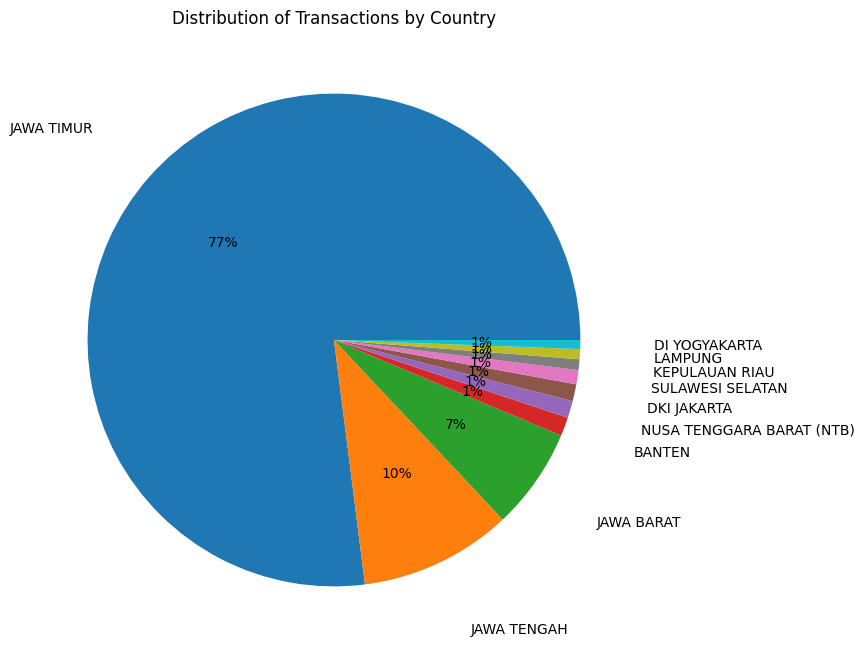

In [ ]:
plt.figure(figsize=[8,8])
plt.pie(top10,labels=top10.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Country")
plt.show()

# **Market Basket Data Preparation**

In [ ]:
# Isolasi transaksi dari 'JAWA TIMUR' jika diperlukan
data_jatim = df[df['Provinsi'] == 'JAWA TIMUR']
data_jatim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No. Pesanan,Status Pesanan,Status Pembatalan/ Pengembalian,Opsi Pengiriman,Antar ke counter/ pick-up,Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan),Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Waktu Pembayaran Dilakukan,Metode Pembayaran,Nama Produk,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Total Diskon,Diskon Dari Penjual,Diskon Dari Shopee,Berat Produk,Jumlah Produk di Pesan,Total Berat,Voucher Ditanggung Penjual,Cashback Koin,Voucher Ditanggung Shopee,Paket Diskon,Paket Diskon (Diskon dari Shopee),Paket Diskon (Diskon dari Penjual),Potongan Koin Shopee,Diskon Kartu Kredit,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Ongkos Kirim Pengembalian Barang,Total Pembayaran,Perkiraan Ongkos Kirim,Catatan dari Pembeli,Username (Pembeli),Nama Penerima,No. Telepon,Alamat Pengiriman,Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai
0,23010160M3FU4A,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 00:27:00,2023-01-01 16:48:00,2023-01-01 00:27:00,2023-01-01 00:27:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Hitam,(S) 60x60",19.899,19.899,1,19.899,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,10.0,0.0,21.695,9.0,Tidak ada,intanp11,I******i,******83,De******,KAB. MAGETAN,JAWA TIMUR,2023-01-02 12:59:00
1,230101758PUTWU,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 11:23:00,2023-01-01 16:48:00,2023-01-01 11:23:00,2023-01-01 11:23:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Latte,(S) 60x60",19.899,19.899,1,19.899,0.0,0.0,0,83 gr,1,83 gr,0.0,0,0.0,N,0,0,0,0,0.0,8.0,0.0,21.695,8.0,Tidak ada,valentizarosifa,V******a,******33,Du******,KAB. MADIUN,JAWA TIMUR,2023-01-02 13:51:00
2,2301016N6NT8B5,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35:00,2023-01-01 16:48:00,2023-01-01 06:35:00,2023-01-01 06:35:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Mocca,(S) 60x60",19.899,19.899,1,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,Tidak ada,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58:00
3,2301016N6NT8B5,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35:00,2023-01-01 16:48:00,2023-01-01 06:35:00,2023-01-01 06:35:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Hitam,(S) 60x60",19.899,19.899,1,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,Tidak ada,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58:00
4,2301016N6NT8B5,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-01-03 06:35:00,2023-01-01 16:48:00,2023-01-01 06:35:00,2023-01-01 06:35:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Charcoal,(S) 60x60",19.899,19.899,1,19.899,0.0,0.0,0,83 gr,3,249 gr,0.0,0,0.0,N,0,0,10592,0,0.0,15.0,0.0,52.069,15.0,Tidak ada,nikmatussoleha071,N***a,******70,Jl******,KAB. BANGKALAN,JAWA TIMUR,2023-01-02 13:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,23102980WAP997,Selesai,Tidak ada,Reguler (Cashless)-J&T Express,Antar ke Counter,2023-10-31 17:51:00,2023-10-30 16:36:00,2023-10-29 17:51:00,2023-10-29 17:51:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...,"Espresso,(S) 60x60",19.900,19.900,1,19.900,0.0,0.0,0,83 gr,2,166 gr,0.0,0,0.0,N,0,0,0,0,0.0,9.0,0.0,42.392,9.0,Tidak ada,tamatata,N******a,******65,"Desa Krowe, RT.01/RW.02, Kecamatan Lembeyan, K...",KAB. MAGETAN,JAWA TIMUR,2023-11-03 02:41:00
6176,231031DDA2C57B,Selesai,Tidak ada,Reguler (Cashless)-SPX Standard,Antar ke Counter,2023-11-02 21:16:00,2023-11-01 17:27:00,2023-10-31 21:16:00,2023-10-31 21:16:00,COD (Bayar di Tempat),Hamidah Sport/Bergo Hamidah S/Hija

## Mengelompokan Data

In [ ]:
# Kelompokkan transaksi berdasarkan 'No. Pesanan' dan 'Nama Produk'
basket = df[df['Provinsi'] =="JAWA TIMUR"]\
         .groupby(['No. Pesanan', 'Nama Produk'])['Jumlah Produk di Pesan']\
         .sum().unstack()\
         .reset_index().fillna(0)\
         .set_index('No. Pesanan')
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet,Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet,Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet,NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY,SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI
No. Pesanan,,,,,,
230101602B57GP,0.0,0.0,0.0,1.0,0.0,0.0
23010160M3FU4A,0.0,0.0,0.0,1.0,0.0,0.0
230101614E5AKY,0.0,0.0,0.0,1.0,0.0,0.0
23010164KWUH04,0.0,0.0,0.0,1.0,0.0,0.0
23010164NPYFDS,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
231030AC5EFGFV,0.0,0.0,0.0,1.0,0.0,0.0
231030APCJX33T,0.0,0.0,0.0,1.0,0.0,0.0
231031CUMWUKHX,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
basket.loc[:, ['Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet',
               'Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet',
               'Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah',
               'Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet',
               'NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY',
               'SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI']].head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet,Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet,Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet,NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY,SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI
No. Pesanan,,,,,,
230101602B57GP,0.0,0.0,0.0,1.0,0.0,0.0
23010160M3FU4A,0.0,0.0,0.0,1.0,0.0,0.0
230101614E5AKY,0.0,0.0,0.0,1.0,0.0,0.0
23010164KWUH04,0.0,0.0,0.0,1.0,0.0,0.0
23010164NPYFDS,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Filter data untuk hanya mencakup transaksi dengan setidaknya satu item
basket = basket[(basket > 0).sum(axis=1) >= 2]
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet,Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet,Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet,NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY,SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI
No. Pesanan,,,,,,
230101871V4C66,0,1,0,1,0,0
230103CBAGQ9J0,0,1,0,1,0,0
230105H7PWR7VK,0,1,0,1,0,0
2301113S45X8JX,0,1,0,1,0,0
2301126DPMYTPB,0,0,0,1,0,1
...,...,...,...,...,...,...
231001R1AXRGBQ,0,1,0,1,0,0
2310042DEEMCPY,0,1,1,0,0,0
2310067NHXHYQ4,0,1,0,1,0,0


## One-hot Encoding

In [ ]:
# Kodekan transaksi menggunakan one-hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet,Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet,Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet,NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY,SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI
No. Pesanan,,,,,,
230101602B57GP,0,0,0,1,0,0
23010160M3FU4A,0,0,0,1,0,0
230101614E5AKY,0,0,0,1,0,0
23010164KWUH04,0,0,0,1,0,0
23010164NPYFDS,0,0,0,1,0,0
...,...,...,...,...,...,...
231030AC5EFGFV,0,0,0,1,0,0
231030APCJX33T,0,0,0,1,0,0
231031CUMWUKHX,0,0,0,1,0,0


In [ ]:
basket_filtered = basket[(basket > 0).sum(axis=1) >= 2]
basket_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet,Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet,Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah,Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet,NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY,SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI
No. Pesanan,,,,,,
230101871V4C66,0,1,0,1,0,0
230103CBAGQ9J0,0,1,0,1,0,0
230105H7PWR7VK,0,1,0,1,0,0
2301113S45X8JX,0,1,0,1,0,0
2301126DPMYTPB,0,0,0,1,0,1
...,...,...,...,...,...,...
231001R1AXRGBQ,0,1,0,1,0,0
2310042DEEMCPY,0,1,1,0,0,0
2310067NHXHYQ4,0,1,0,1,0,0


## Menghitung Jumlah Itemset Unik
Menghitung berapa kali setiap item muncul dalam transaksi dan mencetak jumlahnya.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk
Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet                             49
Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet                             657
Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah                                 15
Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet                                      2684
NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY       5
SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI                               1
dtype: int64


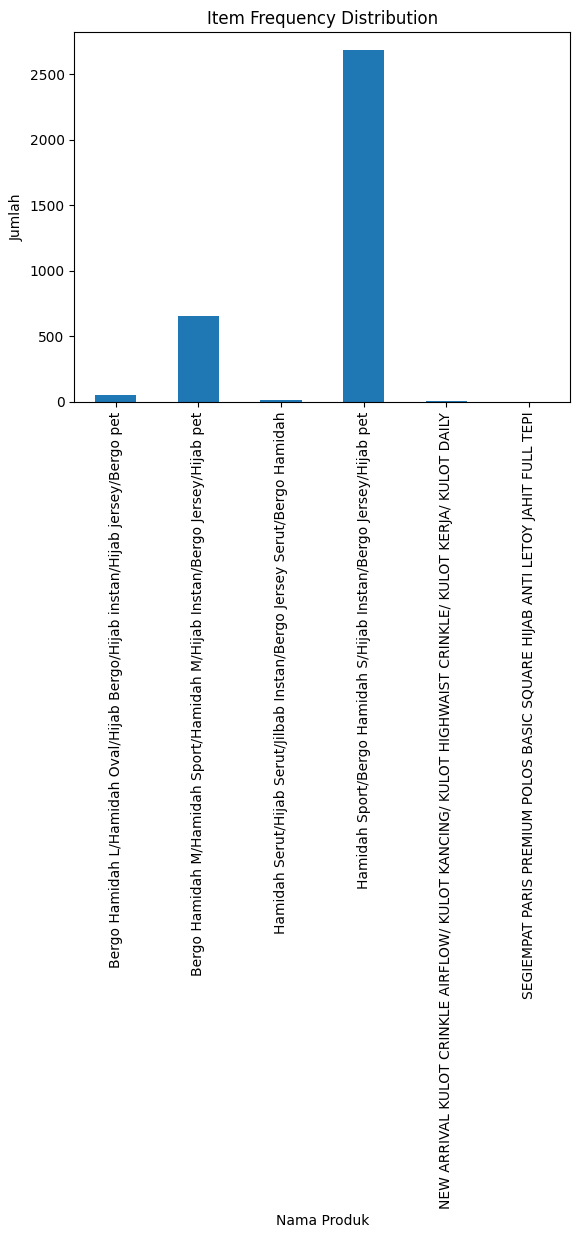

In [ ]:
item_counts = basket.sum()
print(item_counts)

item_counts.plot(kind='bar')
plt.xlabel("Nama Produk")
plt.ylabel("Jumlah")
plt.title('Item Frequency Distribution')
plt.show()


## Menerapkan algoritma Apriori

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.014885,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...
1,0.199575,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...
2,0.004557,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...
3,0.815310,(Hamidah Sport/Bergo Hamidah S/Hijab Instan/Be...
4,0.001519,(NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANC...
5,0.005164,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...
6,0.002126,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...
7,0.001215,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...
8,0.027339,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menerapkan aturan asosiasi

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.014885,0.199575,0.005164,0.346939,1.738390,0.002193,1.225651,0.431173
1,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,0.199575,0.014885,0.005164,0.025875,1.738390,0.002193,1.011283,0.530662
2,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.004557,0.199575,0.001215,0.266667,1.336175,0.000306,1.091489,0.252746
3,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,0.199575,0.004557,0.001215,0.006088,1.336175,0.000306,1.001541,0.314326


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result = rules[(rules['lift']>=1) &
             (rules['confidence']>=0.05)]
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.014885,0.199575,0.005164,0.346939,1.738390,0.002193,1.225651,0.431173
2,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.004557,0.199575,0.001215,0.266667,1.336175,0.000306,1.091489,0.252746


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menerapkan aturan asosiasi
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)
assoc_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.014885,0.199575,0.005164,0.346939,1.738390,0.002193,1.225651,0.431173
1,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,0.199575,0.014885,0.005164,0.025875,1.738390,0.002193,1.011283,0.530662
2,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.004557,0.199575,0.001215,0.266667,1.336175,0.000306,1.091489,0.252746
3,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,0.199575,0.004557,0.001215,0.006088,1.336175,0.000306,1.001541,0.314326


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menampilkan 10 aturan teratas
top_10_rules = rules.head(10)
top_10_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.014885,0.199575,0.005164,0.346939,1.738390,0.002193,1.225651,0.431173
1,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hija...,0.199575,0.014885,0.005164,0.025875,1.738390,0.002193,1.011283,0.530662
2,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,0.004557,0.199575,0.001215,0.266667,1.336175,0.000306,1.091489,0.252746
3,(Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab...,(Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo...,0.199575,0.004557,0.001215,0.006088,1.336175,0.000306,1.001541,0.314326


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Kesimpulan**

Dari hasil analisis MBA (Market Basket Analysis) yang telah dilakukan, berikut adalah kesimpulan yang di dapat:

**Transaksi dibatalkan:**
- Terdapat beberapa transaksi yang telah dibatalkan oleh pelanggan, yang ditandai dengan status "Permintaan Dibatalkan." Contohnya, terdapat beberapa pesanan dengan No. Pesanan seperti '230604FKTUB15Q', '230720F1XUFJT3', dan lainnya yang telah dibatalkan oleh pelanggan.

**Distribusi Transakasi:**
- Sebagian besar transaksi berasal dari wilayah Jawa Timur, dengan Jawa Tengah dan Jawa Barat menjadi wilayah dengan jumlah transaksi terbanyak setelah Jawa Timur.

**Produk yang Sering Dibeli Bersama (Frequent Itemsets):**

- Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet dengan Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet (Dukungan: 5.16%)
- Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet dengan Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet (Dukungan: 2.13%)

**Aturan Asosiasi yang Signifikan:**

- Jika pelanggan membeli Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet, kemungkinan besar mereka juga akan membeli Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet (Confidence: 34.69%, Lift: 1.74).
- Jika pelanggan membeli Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet, kemungkinan besar mereka juga akan membeli Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet (Confidence: 2.59%, Lift: 1.74).
- Jika pelanggan membeli Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah, kemungkinan besar mereka juga akan membeli Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet (Confidence: 26.67%, Lift: 1.34).
- Jika pelanggan membeli Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet, kemungkinan besar mereka juga akan membeli Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah (Confidence: 0.61%, Lift: 1.34).

**Rekomendasi Bundling:**
Berdasarkan aturan asosiasi, bisa dilakukan strategi pemasaran atau bundling untuk meningkatkan penjualan. Berikut rekomendasi bundling yang dapat di terapkan:

**Bundle 1:**

Produk 1: Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet (Rp. 22.899)

Produk 2: Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet (Rp. 25.899)

Harga Normal Total: Rp. 48.798

Harga Diskon Bundle 15% off: Rp. 41.478

**Bundle 2:**

Produk 1: Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah (Rp. 27.899)

Produk 2: Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet (Rp. 22.899)

Harga Normal Total: Rp. 50.798

Harga Diskon Bundle 10% off: Rp. 45.718

